In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
runwalk=pd.read_csv(r'C:\Users\ELCOT\Documents\Machine learning\Datasets\run or walk.csv')

In [3]:
runwalk.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
runwalk.shape

(88588, 11)

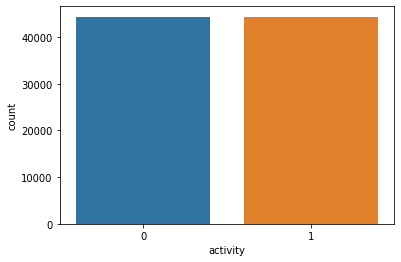

In [5]:
sns.countplot('activity',data=runwalk)

In [6]:
runwalk.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [7]:
runwalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [8]:
runwalk.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [9]:
runwalk.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X=runwalk.iloc[:,5:].values
y=runwalk.iloc[:,4].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66441, 6)
(22147, 6)
(66441,)
(22147,)


In [13]:
#Applying algorithm
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred=gNB.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,classification_report
target_names=["walk","run"]
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.9576917866979726


In [21]:
classification_report(y_test,y_pred,target_names=target_names)

'              precision    recall  f1-score   support\n\n        walk       0.93      0.99      0.96     11162\n         run       0.99      0.92      0.96     10985\n\n    accuracy                           0.96     22147\n   macro avg       0.96      0.96      0.96     22147\nweighted avg       0.96      0.96      0.96     22147\n'